# Introduction
Pandas is an open-source Python Library providing high-performance data manipulation and analysis tool using its powerful data structures. The name Pandas is derived from the word Panel Data – an Econometrics from Multidimensional data.

Python with Pandas is used in a wide range of fields including academic and commercial domains including finance, economics, Statistics, analytics, etc.

**Key Features of Pandas**

* Fast and efficient DataFrame object with default and customized indexing.
* Tools for loading data into in-memory data objects from different file formats.
* Data alignment and integrated handling of missing data.
* Reshaping and pivoting of date sets.
* Label-based slicing, indexing and subsetting of large data sets.
* Columns from a data structure can be deleted or inserted.
* Group by data for aggregation and transformations.
* High performance merging and joining of data.
* Time Series functionality.

# Introduction to Data Structures

Pandas deals with the following three data structures:

* DataFrame
* Series
* Panel

These data structures are built on top of Numpy array, which means they are fast.

# Python Pandas - DataFrame

A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns.

## Create DataFrame
### Create an Empty DataFrame

```python
import pandas as pd
df = pd.DataFrame()
print df
```

### Create a DataFrame from Lists

In [4]:
data = [1,2,3,4,5]
df = pd.DataFrame(data)
df

,0
0,1
1,2
2,3
3,4
4,5


In [9]:
data = [['Duyet',10], ['Thinh',12], ['Nam',13]]
df = pd.DataFrame(data,columns=['Name','Age'])
df

,Name,Age
0,Duyet,10
1,Thinh,12
2,Nam,13


In [10]:
data = [['Duyet',10], ['Thinh',12], ['Nam',13]]
df = pd.DataFrame(data,columns=['Name','Age'], dtype=float)
df

,Name,Age
0,Duyet,10.0
1,Thinh,12.0
2,Nam,13.0


### Create a DataFrame from Dict of ndarrays / Lists

All the ndarrays must be of same length. If index is passed, then the length of the index should equal to the length of the arrays.

If no index is passed, then by default, index will be range(n), where n is the array length.

In [11]:
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data)
df

,Age,Name
0,28,Tom
1,34,Jack
2,29,Steve
3,42,Ricky


### Create a DataFrame from List of Dicts

In [14]:
data = [{'a': 1, 'b': 2},{'a': 5, 'b': 10, 'c': 20}]
df = pd.DataFrame(data)
df

# PS: NaN (Not a Number) is appended in missing areas.

,a,b,c
0,1,2,NaN
1,5,10,20.0


### Reading from file (CSV, Excel, HDFS, SQL, ...)

Using `pd.read_csv()` function to read dataframe from a CSV file.

```python
pandas.read_csv(filepath_or_buffer, sep='\t', delimiter=None, header='infer',
                names=None, index_col=None, usecols=None)
```

Using `pd.read_excel()` to read Excel file.

```python
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])
```

Example: Here is how the csv file data (*data.csv*) looks like:

```csv
S.No,Name,Age,City,Salary
1,Tom,28,Toronto,20000
2,Lee,32,HongKong,3000
3,Steven,43,Bay Area,8300
4,Ram,38,Hyderabad,3900
```

In [6]:
df=pd.read_csv("data.csv")
df

,S.No,Name,Age,City,Salary
0,1,Tom,28,Toronto,20000
1,2,Lee,32,HongKong,3000
2,3,Steven,43,Bay Area,8300
3,4,Ram,38,Hyderabad,3900


Specify the names of the header using the **names** argument.

In [17]:
df=pd.read_csv("data.csv", names=['a', 'b', 'c','d','e'])
df

,a,b,c,d,e
0,S.No,Name,Age,City,Salary
1,1,Tom,28,Toronto,20000
2,2,Lee,32,HongKong,3000
3,3,Steven,43,Bay Area,8300
4,4,Ram,38,Hyderabad,3900


## Viewing Data

In [89]:
df.head()

,S.No,Name,Age,City,Salary,Salary2
0,1,Tom,28,Toronto,20000,141.421356
1,2,Lee,32,HongKong,3000,54.772256
2,3,Steven,43,Bay Area,8300,91.104336
3,4,Ram,38,Hyderabad,3900,62.449980


In [91]:
df.tail(3)

,S.No,Name,Age,City,Salary,Salary2
1,2,Lee,32,HongKong,3000,54.772256
2,3,Steven,43,Bay Area,8300,91.104336
3,4,Ram,38,Hyderabad,3900,62.449980


In [92]:
df.T

,0,1,2,3
S.No,1,2,3,4
Name,Tom,Lee,Steven,Ram
Age,28,32,43,38
City,Toronto,HongKong,Bay Area,Hyderabad
Salary,20000,3000,8300,3900
Salary2,141.421,54.7723,91.1043,62.45


## Column Selection

We will understand this by selecting a column from the DataFrame.


In [18]:
df=pd.read_csv("data.csv")
df["Name"]

0       Tom
1       Lee
2    Steven
3       Ram
Name: Name, dtype: object

In [20]:
# Or this
df.Name

0       Tom
1       Lee
2    Steven
3       Ram
Name: Name, dtype: object

## Sort

In [94]:
df.sort_values(by='Age')

,S.No,Name,Age,City,Salary,Salary2
0,1,Tom,28,Toronto,20000,141.421356
1,2,Lee,32,HongKong,3000,54.772256
3,4,Ram,38,Hyderabad,3900,62.449980
2,3,Steven,43,Bay Area,8300,91.104336


In [96]:
df.sort_values(by='Salary', ascending=False)

,S.No,Name,Age,City,Salary,Salary2
0,1,Tom,28,Toronto,20000,141.421356
2,3,Steven,43,Bay Area,8300,91.104336
3,4,Ram,38,Hyderabad,3900,62.449980
1,2,Lee,32,HongKong,3000,54.772256


## Column Addition

In [21]:
df=pd.read_csv("data.csv")
df

,S.No,Name,Age,City,Salary
0,1,Tom,28,Toronto,20000
1,2,Lee,32,HongKong,3000
2,3,Steven,43,Bay Area,8300
3,4,Ram,38,Hyderabad,3900


In [22]:
# Add new column "Address"
df["Address"] = ["HCM", "HN", "DN", "HCM"]
df

,S.No,Name,Age,City,Salary,Address
0,1,Tom,28,Toronto,20000,HCM
1,2,Lee,32,HongKong,3000,HN
2,3,Steven,43,Bay Area,8300,DN
3,4,Ram,38,Hyderabad,3900,HCM


In [23]:
# Or new column with default value
df["LastSalary"] = 1000
df

,S.No,Name,Age,City,Salary,Address,LastSalary
0,1,Tom,28,Toronto,20000,HCM,1000
1,2,Lee,32,HongKong,3000,HN,1000
2,3,Steven,43,Bay Area,8300,DN,1000
3,4,Ram,38,Hyderabad,3900,HCM,1000


In [24]:
# New column base on old columns
df["NewSalary"] = df.Salary + df.LastSalary
df

,S.No,Name,Age,City,Salary,Address,LastSalary,NewSalary
0,1,Tom,28,Toronto,20000,HCM,1000,21000
1,2,Lee,32,HongKong,3000,HN,1000,4000
2,3,Steven,43,Bay Area,8300,DN,1000,9300
3,4,Ram,38,Hyderabad,3900,HCM,1000,4900


## Column Deletion

Columns can be deleted or popped; let us take an example to understand how.



In [25]:
del df["NewSalary"]
df

,S.No,Name,Age,City,Salary,Address,LastSalary
0,1,Tom,28,Toronto,20000,HCM,1000
1,2,Lee,32,HongKong,3000,HN,1000
2,3,Steven,43,Bay Area,8300,DN,1000
3,4,Ram,38,Hyderabad,3900,HCM,1000


In [26]:
LastSalary = df.pop('LastSalary')
df

,S.No,Name,Age,City,Salary,Address
0,1,Tom,28,Toronto,20000,HCM
1,2,Lee,32,HongKong,3000,HN
2,3,Steven,43,Bay Area,8300,DN
3,4,Ram,38,Hyderabad,3900,HCM


In [27]:
LastSalary

0    1000
1    1000
2    1000
3    1000
Name: LastSalary, dtype: int64

## Row Selection, Addition, and Deletion

We will now understand row selection, addition and deletion through examples

### Selection by Label

In [28]:
df["City"]

0      Toronto
1     HongKong
2     Bay Area
3    Hyderabad
Name: City, dtype: object

### Selection by integer location

In [29]:
df.iloc[2]

S.No              3
Name         Steven
Age              43
City       Bay Area
Salary         8300
Address          DN
Name: 2, dtype: object

### Slice Rows
Multiple rows can be selected using ':' operator.

In [31]:
df[2:4]

,S.No,Name,Age,City,Salary,Address
2,3,Steven,43,Bay Area,8300,DN
3,4,Ram,38,Hyderabad,3900,HCM


### Addition of Rows

Add new rows to a DataFrame using the **append** function. This function will append the rows at the end.

In [32]:
df1 = pd.DataFrame([[1, 2], [3, 4]], columns = ['a','b'])
df2 = pd.DataFrame([[5, 6], [7, 8]], columns = ['a','b'])

df1.append(df2)

,a,b
0,1,2
1,3,4
0,5,6
1,7,8


### Boolean Indexing

Using a single column’s values to select data.



In [98]:
df[df.Salary > 4000]

,S.No,Name,Age,City,Salary,Salary2
0,1,Tom,28,Toronto,20000,141.421356
2,3,Steven,43,Bay Area,8300,91.104336


Using the **isin()** method for filtering:

In [100]:
df[df.Name.isin(['Tom', 'Ram'])]

,S.No,Name,Age,City,Salary,Salary2
0,1,Tom,28,Toronto,20000,141.421356
3,4,Ram,38,Hyderabad,3900,62.449980


### Drop duplicates

In [101]:
df.drop_duplicates()

,S.No,Name,Age,City,Salary,Salary2
0,1,Tom,28,Toronto,20000,141.421356
1,2,Lee,32,HongKong,3000,54.772256
2,3,Steven,43,Bay Area,8300,91.104336
3,4,Ram,38,Hyderabad,3900,62.449980


In [102]:
df2 = df.copy()
df2["Company"] = [ "JVN", "JVN", "UIT", "UIT" ]
df2

,S.No,Name,Age,City,Salary,Salary2,Company
0,1,Tom,28,Toronto,20000,141.421356,JVN
1,2,Lee,32,HongKong,3000,54.772256,JVN
2,3,Steven,43,Bay Area,8300,91.104336,UIT
3,4,Ram,38,Hyderabad,3900,62.449980,UIT


In [103]:
df2.drop_duplicates("Company")

,S.No,Name,Age,City,Salary,Salary2,Company
0,1,Tom,28,Toronto,20000,141.421356,JVN
2,3,Steven,43,Bay Area,8300,91.104336,UIT


# Python Pandas - Series

Series is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index.

## Create a Series
### Create an Empty Series

In [34]:
s = pd.Series()
s

Series([], dtype: float64)

### Create a Series from ndarray

In [39]:
# Ex1
s = pd.Series([1,2,3,4])
s

0    1
1    2
2    3
3    4
dtype: int64

In [40]:
# Ex2 
import numpy as np
data = np.array([1,2,3,4])
s = pd.Series(data)
s

0    1
1    2
2    3
3    4
dtype: int64

In [42]:
# Ex3
data = np.array(['a','b','c','d'])
s = pd.Series(data,index=[100,101,102,103])
s

100    a
101    b
102    c
103    d
dtype: object

### Create a Series from Scalar

If data is a scalar value, an index must be provided. The value will be repeated to match the length of index

In [43]:
s = pd.Series(5, index=[0, 1, 2, 3])
s

0    5
1    5
2    5
3    5
dtype: int64

## Accessing Data from Series with Position
Data in the series can be accessed similar to that in an ndarray.

Ex1: Retrieve the first element. As we already know, the counting starts from zero for the array, which means the first element is stored at zeroth position and so on.

In [47]:
s = pd.Series([1,2,3,4,5],index = ['a','b','c','d','e'])

print s

print "\nretrieve the first element:"
print s[0]

a    1
b    2
c    3
d    4
e    5
dtype: int64

retrieve the first element:
1


In [48]:
# Retrieve the first three elements in the Series
print s[:3]

a    1
b    2
c    3
dtype: int64


## Retrieve Data Using Label (Index)

A Series is like a fixed-size dict in that you can get and set values by index label.

In [51]:
s = pd.Series([1,2,3,4,5],index = ['a','b','c','d','e'])

print s

print

#retrieve a single element
print s['a']

a    1
b    2
c    3
d    4
e    5
dtype: int64

1


In [52]:
#retrieve multiple elements
print s[['a','c','d']]

a    1
c    3
d    4
dtype: int64


In [53]:
# If a label is not contained, an exception is raised.
print s['f']

KeyError: 'f'

# Python Pandas - Descriptive Statistics

A large number of methods collectively compute descriptive statistics and other related operations on DataFrame. Most of these are aggregations like sum(), mean(), but some of them, like sumsum(), produce an object of the same size. Generally speaking, these methods take an axis argument, just like ndarray.{sum, std, ...}, but the axis can be specified by name or integer.

Let's create a DataFrame and use this object throughout this chapter for all the operations.

In [54]:
df = pd.read_csv("data.csv")
df

,S.No,Name,Age,City,Salary
0,1,Tom,28,Toronto,20000
1,2,Lee,32,HongKong,3000
2,3,Steven,43,Bay Area,8300
3,4,Ram,38,Hyderabad,3900


## sum()

Returns the sum of the values for the requested axis. By default, axis is index (axis=0).

In [55]:
df.sum()

S.No                                    10
Name                       TomLeeStevenRam
Age                                    141
City      TorontoHongKongBay AreaHyderabad
Salary                               35200
dtype: object

In [56]:
df.sum(axis=1)

0    20029
1     3034
2     8346
3     3942
dtype: int64

## mean()

In [57]:
df.mean()

S.No         2.50
Age         35.25
Salary    8800.00
dtype: float64

In [58]:
df.mean(1)

0    6676.333333
1    1011.333333
2    2782.000000
3    1314.000000
dtype: float64

## std()
Returns the Bressel standard deviation of the numerical columns.



In [59]:
df.std()

S.No         1.290994
Age          6.601767
Salary    7817.501732
dtype: float64

## Functions & Description

The following table list down the important functions

| S.No. | Function  | Description                      |
|-------|-----------|----------------------------------|
| 1     | count()   | Number of non-null observations  |
| 2     | sum()     | Sum of values                    |
| 3     | mean()    | Mean of Values                   |
| 4     | median()  | Median of Values                 |
| 5     | mode()    | Mode of values                   |
| 6     | std()     | Standard Deviation of the Values |
| 7     | min()     | Minimum Value                    |
| 8     | max()     | Maximum Value                    |
| 9     | abs()     | Absolute Value                   |
| 10    | prod()    | Product of Values                |
| 11    | cumsum()  | Cumulative Sum                   |
| 12    | cumprod() | Cumulative Product               |

## Summarizing Data

The **describe()** function computes a summary of statistics pertaining to the DataFrame columns.

In [60]:
df.describe()

,S.No,Age,Salary
count,4.000000,4.000000,4.000000
mean,2.500000,35.250000,8800.000000
std,1.290994,6.601767,7817.501732
min,1.000000,28.000000,3000.000000
25%,1.750000,31.000000,3675.000000
50%,2.500000,35.000000,6100.000000
75%,3.250000,39.250000,11225.000000
max,4.000000,43.000000,20000.000000


And, function excludes the character columns and given summary about numeric columns. **'include'** is the argument which is used to pass necessary information regarding what columns need to be considered for summarizing. Takes the list of values; by default, 'number'.

* **object** − Summarizes String columns
* **number** − Summarizes Numeric columns
* **all** − Summarizes all columns together (Should not pass it as a list value)

In [62]:
df.describe(include=['object'])

,Name,City
count,4,4
unique,4,4
top,Steven,Bay Area
freq,1,1


# Python Pandas - Function Application

To apply your own or another library’s functions to Pandas objects, you should be aware of the three important methods. The methods have been discussed below. The appropriate method to use depends on whether your function expects to operate on an entire DataFrame, row- or column-wise, or element wise.

* Table wise Function Application: pipe()
* Row or Column Wise Function Application: apply()
* Element wise Function Application: applymap()

In [63]:
df

,S.No,Name,Age,City,Salary
0,1,Tom,28,Toronto,20000
1,2,Lee,32,HongKong,3000
2,3,Steven,43,Bay Area,8300
3,4,Ram,38,Hyderabad,3900


In [67]:
df['Salary2'] = df.Salary.apply(np.sqrt)
df

,S.No,Name,Age,City,Salary,Salary2
0,1,Tom,28,Toronto,20000,141.421356
1,2,Lee,32,HongKong,3000,54.772256
2,3,Steven,43,Bay Area,8300,91.104336
3,4,Ram,38,Hyderabad,3900,62.449980


# GroupBy

Reference: [https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm](https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm)

In [74]:
df.groupby("Name").count()

,S.No,Age,City,Salary,Salary2
Name,,,,,
Lee,1,1,1,1,1
Ram,1,1,1,1,1
Steven,1,1,1,1,1
Tom,1,1,1,1,1


In [75]:
df.groupby("Name")['Salary'].count()

Name
Lee       1
Ram       1
Steven    1
Tom       1
Name: Salary, dtype: int64

In [76]:
df.groupby("Name")['Salary'].mean()

Name
Lee        3000
Ram        3900
Steven     8300
Tom       20000
Name: Salary, dtype: int64

# Merging/Joining

Pandas has full-featured, high performance in-memory join operations idiomatically very similar to relational databases like SQL.

```python
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
    left_index=False, right_index=False, sort=True)
```

* **left** − A DataFrame object.
* **right** − Another DataFrame object.
* **on** − Columns (names) to join on. Must be found in both the left and right DataFrame objects.
* **left_on** − Columns from the left DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame.
* **right_on** − Columns from the right DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame.
* **left_index** − If True, use the index (row labels) from the left DataFrame as its join key(s). In case of a DataFrame with a MultiIndex (hierarchical), the number of levels must match the number of join keys from the right DataFrame.
* **right_index** − Same usage as left_index for the right DataFrame.
* **how** − One of 'left', 'right', 'outer', 'inner'. Defaults to inner. Each method has been described below.
* **sort** − Sort the result DataFrame by the join keys in lexicographical order. Defaults to True, setting to False will improve the performance substantially in many cases.* **left** − A DataFrame object.
* **right** − Another DataFrame object.
* **on** − Columns (names) to join on. Must be found in both the left and right DataFrame objects.
* **left_on** − Columns from the left DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame.
* **right_on** − Columns from the right DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame.
* **left_index** − If True, use the index (row labels) from the left DataFrame as its join key(s). In case of a DataFrame with a MultiIndex (hierarchical), the number of levels must match the number of join keys from the right DataFrame.
* **right_index** − Same usage as left_index for the right DataFrame.
* **how** − One of 'left', 'right', 'outer', 'inner'. Defaults to inner. Each method has been described below.
* **sort** − Sort the result DataFrame by the join keys in lexicographical order. Defaults to True, setting to False will improve the performance substantially in many cases.

In [78]:
left = pd.DataFrame({
         'id':[1,2,3,4,5],
         'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
         'subject_id':['sub1','sub2','sub4','sub6','sub5']})
right = pd.DataFrame(
         {'id':[1,2,3,4,5],
         'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
         'subject_id':['sub2','sub4','sub3','sub6','sub5']})
left

,Name,id,subject_id
0,Alex,1,sub1
1,Amy,2,sub2
2,Allen,3,sub4
3,Alice,4,sub6
4,Ayoung,5,sub5


In [79]:
right

,Name,id,subject_id
0,Billy,1,sub2
1,Brian,2,sub4
2,Bran,3,sub3
3,Bryce,4,sub6
4,Betty,5,sub5


## Merge Two DataFrames on a Key

In [80]:
pd.merge(left,right,on='id')

,Name_x,id,subject_id_x,Name_y,subject_id_y
0,Alex,1,sub1,Billy,sub2
1,Amy,2,sub2,Brian,sub4
2,Allen,3,sub4,Bran,sub3
3,Alice,4,sub6,Bryce,sub6
4,Ayoung,5,sub5,Betty,sub5


## Merge Two DataFrames on Multiple Keys

In [81]:
pd.merge(left,right,on=['id','subject_id'])

,Name_x,id,subject_id,Name_y
0,Alice,4,sub6,Bryce
1,Ayoung,5,sub5,Betty


## Left/Right Join

In [82]:
pd.merge(left, right, on='subject_id', how='left')

,Name_x,id_x,subject_id,Name_y,id_y
0,Alex,1,sub1,NaN,NaN
1,Amy,2,sub2,Billy,1.0
2,Allen,3,sub4,Brian,2.0
3,Alice,4,sub6,Bryce,4.0
4,Ayoung,5,sub5,Betty,5.0


In [83]:
pd.merge(left, right, on='subject_id', how='right')

,Name_x,id_x,subject_id,Name_y,id_y
0,Amy,2.0,sub2,Billy,1
1,Allen,3.0,sub4,Brian,2
2,Alice,4.0,sub6,Bryce,4
3,Ayoung,5.0,sub5,Betty,5
4,NaN,NaN,sub3,Bran,3


## Inner/Outer Join

In [84]:
pd.merge(left, right, on='subject_id', how='inner')

,Name_x,id_x,subject_id,Name_y,id_y
0,Amy,2,sub2,Billy,1
1,Allen,3,sub4,Brian,2
2,Alice,4,sub6,Bryce,4
3,Ayoung,5,sub5,Betty,5


In [85]:
pd.merge(left, right, on='subject_id', how='outer')

,Name_x,id_x,subject_id,Name_y,id_y
0,Alex,1.0,sub1,NaN,NaN
1,Amy,2.0,sub2,Billy,1.0
2,Allen,3.0,sub4,Brian,2.0
3,Alice,4.0,sub6,Bryce,4.0
4,Ayoung,5.0,sub5,Betty,5.0
5,NaN,NaN,sub3,Bran,3.0


# Concatenation

Pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects.

```python
pd.concat(objs,axis=0,join='outer',join_axes=None, ignore_index=False)
```

In [86]:
pd.concat([left, right])

,Name,id,subject_id
0,Alex,1,sub1
1,Amy,2,sub2
2,Allen,3,sub4
3,Alice,4,sub6
4,Ayoung,5,sub5
0,Billy,1,sub2
1,Brian,2,sub4
2,Bran,3,sub3
3,Bryce,4,sub6
4,Betty,5,sub5


In [87]:
pd.concat([left, right], keys=['x', 'y'])

Name  id subject_id
x 0    Alex   1       sub1
  1     Amy   2       sub2
  2   Allen   3       sub4
  3   Alice   4       sub6
  4  Ayoung   5       sub5
y 0   Billy   1       sub2
  1   Brian   2       sub4
  2    Bran   3       sub3
  3   Bryce   4       sub6
  4   Betty   5       sub5

Concatenating Using append

In [88]:
left.append(right)

,Name,id,subject_id
0,Alex,1,sub1
1,Amy,2,sub2
2,Allen,3,sub4
3,Alice,4,sub6
4,Ayoung,5,sub5
0,Billy,1,sub2
1,Brian,2,sub4
2,Bran,3,sub3
3,Bryce,4,sub6
4,Betty,5,sub5


# Histogramming

See more at [Histogramming and Discretization](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [108]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [109]:
s.value_counts()

6    3
5    2
4    1
3    1
2    1
1    1
0    1
dtype: int64

# Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)



In [112]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng[:5]

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04'],
              dtype='datetime64[ns]', freq='S')

In [113]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    187
2012-01-01 00:00:01    314
2012-01-01 00:00:02    211
2012-01-01 00:00:03    141
2012-01-01 00:00:04     90
2012-01-01 00:00:05      0
2012-01-01 00:00:06    255
2012-01-01 00:00:07    393
2012-01-01 00:00:08    237
2012-01-01 00:00:09    109
2012-01-01 00:00:10     90
2012-01-01 00:00:11    115
2012-01-01 00:00:12     91
2012-01-01 00:00:13      7
2012-01-01 00:00:14    472
2012-01-01 00:00:15    125
2012-01-01 00:00:16    468
2012-01-01 00:00:17    243
2012-01-01 00:00:18    495
2012-01-01 00:00:19    221
2012-01-01 00:00:20    428
2012-01-01 00:00:21     35
2012-01-01 00:00:22    451
2012-01-01 00:00:23    440
2012-01-01 00:00:24    213
2012-01-01 00:00:25    171
2012-01-01 00:00:26    267
2012-01-01 00:00:27    167
2012-01-01 00:00:28    484
2012-01-01 00:00:29    454
                      ... 
2012-01-01 00:01:10     33
2012-01-01 00:01:11    209
2012-01-01 00:01:12     37
2012-01-01 00:01:13    495
2012-01-01 00:01:14     46
2012-01-01 00:01:15    440
2

In [114]:
ts.resample('5Min').sum()

2012-01-01    26667
Freq: 5T, dtype: int64

# Plotting

See more: [https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization)

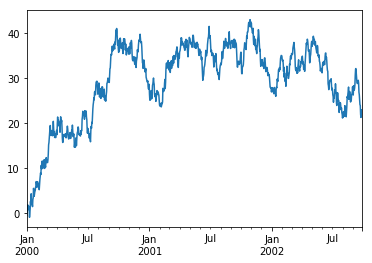

In [5]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

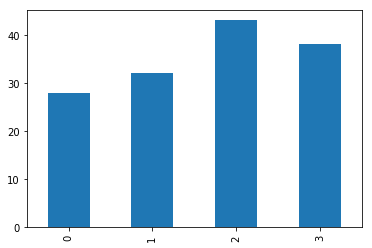

In [8]:
df.Age.plot(kind='bar')

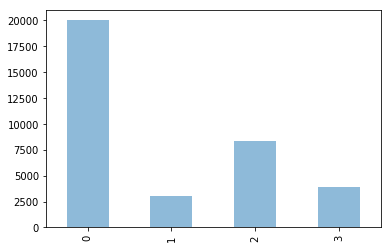

In [29]:
df.Salary.plot.bar(alpha=0.5)

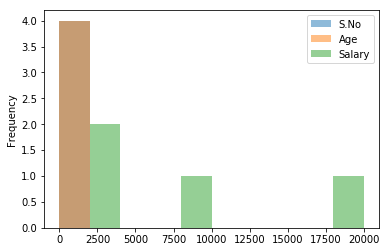

In [13]:
df.plot.hist(alpha=0.5)

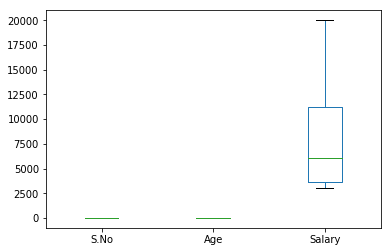

In [14]:
df.plot.box()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f73e066d3d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f73e05e4c50>], dtype=object)

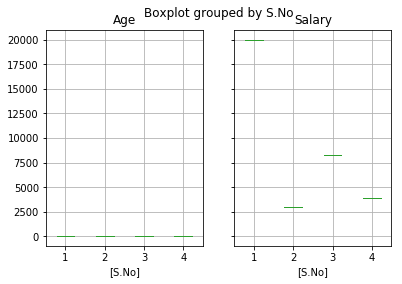

In [17]:
df.boxplot(by='S.No')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73d70c9f10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f73d59cdf90>]], dtype=object)

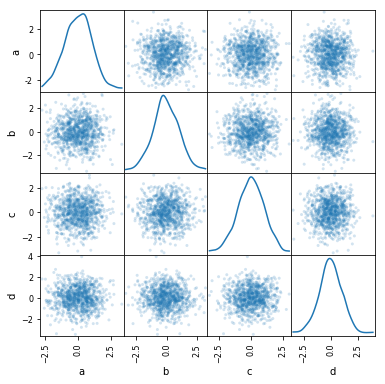

In [30]:
from pandas.plotting import scatter_matrix
df_plot = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
scatter_matrix(df_plot, alpha=0.2, figsize=(6, 6), diagonal='kde')

# References

* [Python Pandas Tutorial (tutorialspoint)](https://www.tutorialspoint.com/python_pandas/index.htm)
* [Lessons for New pandas Users (pandas.pydata.org)](https://pandas.pydata.org/pandas-docs/stable/tutorials.html#lessons-for-new-pandas-users)
* [Exercises for New Users (pandas.pydata.org)](https://pandas.pydata.org/pandas-docs/stable/tutorials.html#exercises-for-new-users)